In [5]:
import os, sys
import h5py
import numpy as np
import scipy as sp
from astropy import constants as const
import matplotlib.pyplot as plt
import units as un
from readdata import *

import yt
from yt.funcs import mylog
mylog.setLevel(40)

%matplotlib notebook
%matplotlib inline

/u/lgaertner/miniconda3/lib/python3.9/_collections_abc.py:684: MatplotlibDeprecationWarning: The global colormaps dictionary is no longer considered public API.
  self[key]


In [2]:
#Define the units
mbin = 3. #M_sun
abin = 50. #AU
u = un.units(mbin, abin)

In [31]:
os.chdir("/u/lgaertner/BINARY/RUN_DIR/outputSMR2D/")
prim2d = np.sort([f for f in os.listdir(os.getcwd()) if f.endswith(".athdf") and f.startswith("cbd.out1")])[1:2]

In [32]:
r2=[]
unit_base= {"length_unit":(u.abin,"AU"), "time_unit":(u.tbin,"s"), "mass_unit":(u.mbin,"Msun")}
for fprim in prim2d:
        ds_prim = yt.load(fprim, units_override = unit_base)
        # level = number of refinements
        # dims = total dimensions 2**(refinement level)
        all_data_level_1_prim = ds_prim.covering_grid(level=2, \
                                        left_edge=ds_prim.domain_left_edge, dims=ds_prim.domain_dimensions * 2**2)
        rho = all_data_level_1_prim["rho"].in_units("g/cm**3").to_ndarray() # rho is a NumPy array
        print(ds_prim.field_list)
        r2.append(rho)
print(np.shape(r2))

[('athena_pp', 'press'), ('athena_pp', 'rho'), ('athena_pp', 'vel1'), ('athena_pp', 'vel2'), ('athena_pp', 'vel3')]
(1, 1024, 1024, 4)


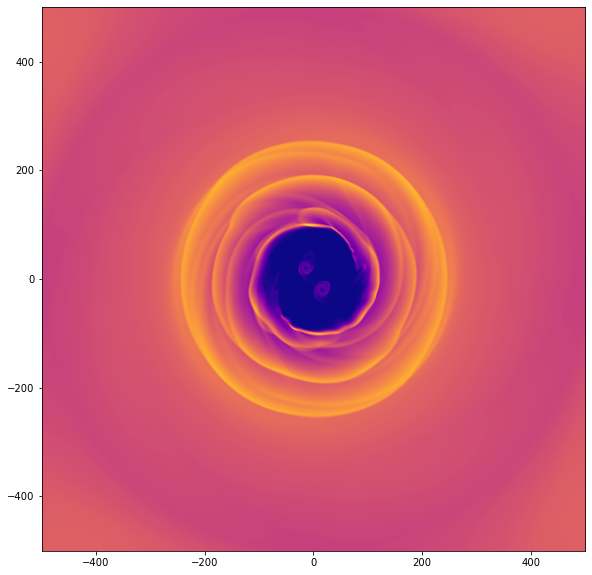

In [34]:
n = np.array(r2)[:,:,:,0]
frame = u.abin * 10

fig = plt.figure(figsize=(10,10))
cmap="plasma"
ax = fig.add_subplot(111)
pos = ax.imshow(n[0], cmap=cmap, origin='lower', \
                extent=[-frame,frame,-frame,frame])
fig.show()

In [12]:
os.chdir("/u/lgaertner/BINARY/RUN_DIR/outputSMR3Dlong")
prim3d = np.sort([f for f in os.listdir(os.getcwd()) if f.endswith(".athdf") and f.startswith("cbd.out1")])[:1]

In [35]:
r3 =[]
for fprim in prim3d:
        ds_prim = yt.load(fprim, units_override = unit_base)
        all_data_level_1_prim = ds_prim.covering_grid(level=1, \
                                        left_edge=ds_prim.domain_left_edge, dims=ds_prim.domain_dimensions * 2)
        rho = all_data_level_1_prim["rho"].in_units("g/cm**3").to_ndarray() # rho is a NumPy array
        print(ds_prim.field_list)
        r3.append(rho)
print(np.shape(r3)[1])

[('athena_pp', 'press'), ('athena_pp', 'rho'), ('athena_pp', 'vel1'), ('athena_pp', 'vel2'), ('athena_pp', 'vel3')]
512
